# Análisis de texto

In [189]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')


import pandas as pd
import numpy as np
import os
import tensorflow as tf
import re
import matplotlib.pyplot as plt
#modelling
import gensim
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from tensorboard.plugins import projector


In [223]:
with open ('/Users/anni/Sistemas de Información/Proyecto/Tweetstr.txt',
           'r',encoding='utf-8') as file:
        document = file.read()

In [235]:
# preprocess data
def pre_process(text):
    
    #convert to lowercase
    text = str(text).lower()
    #eliminar carácteres
    text=re.sub("[$@&/}{'→''¿?#``►,"".1234567890:]","",text)
    text=re.sub("translation","",text)
    text=re.sub("screen_nametweet","",text)
    text=re.sub("_text","",text)
    text=re.sub("https","",text)
    # remove stop words
    text = " ".join([word for word in text.split() if word not in stopWords])
    
    return text
text=pre_process(document)

In [236]:
text[:100]

'eltiempo gustavo petro gives version past drinking speech girardot said tcondfumfsru tcodgmnjtbu elt'

In [237]:
# tokenizar el documento en oraciones
sentences = nltk.sent_tokenize(text)
sentences[4]

'west ham player kurt zouma appears videos kicking slapping cat tcocsbxyznh tcoojqhklmi eltiempo one topics addressed cybersecurity electoral era ↓ tcokdjxrxjkv eltiempo already thousand deaths covid- colombia tcougyecdnq tcojzmfmucf eltiempo pedro castillo says attempting coups tcouxcyjjcij tcoqcsntwie eltiempo" ""blogset (eltimeblogs) read pam amp; tommy tinder swindler tconorbtlbwu tcoefoievxul""" eltiempo attention!'

## Análisis de sentimientos

### word2Vec

In [238]:
word_tokens = [nltk.tokenize.word_tokenize(sentence.lower()) for sentence in sentences]
word_tokens[1]

['still',
 'restrictions',
 'colombian',
 'travelers',
 'around',
 'world',
 'tell',
 'tcosanxpklbco',
 'tcoxmjmdtqhsg',
 'eltiempo',
 "''",
 '``',
 "''",
 'why',
 'humans',
 'creating',
 'form',
 'unnatural',
 'selection',
 'tell',
 'via',
 'bbcmundo',
 'tcopncddozv',
 'tcodctagqzhc',
 "''",
 "''",
 "''",
 'eltiempo',
 'know',
 'black',
 'hole',
 'moving',
 'space',
 'tcoterrrmkrw',
 'tcocaoqlwhzx',
 'eltiempo',
 'live',
 'manizales',
 'want',
 'learn',
 'english',
 'free',
 'learn',
 'initiative',
 'tcoucsqyhfle',
 'tcoswusjgpqq',
 'eltiempo',
 'please',
 'note',
 'important',
 'urinate',
 'sex',
 'tell',
 'tcoufsnuykt',
 'tcoeekdpw',
 'eltiempo',
 "''",
 '``',
 "''",
 'impact',
 'amazon',
 'forest',
 'fires',
 'everyones',
 'health',
 'tcohgtewdej',
 'tcoqoqgttzw',
 "''",
 "''",
 "''",
 'eltiempo',
 "''",
 'bees',
 'dogs',
 'snakes',
 'advice',
 'act',
 'attack',
 'tcoxvurvphrb',
 'tcolblhuiayy',
 "''",
 'eltiempo',
 "''",
 '``',
 "''",
 'super',
 'bowl',
 'rarest',
 'bets',
 'sunda

## Word embedding
Técnica donde las palabras o frases del lenguaje natural son representadas como vectores de números reales

#### Modelo Word2Vec

In [239]:
size = 100
window_size = 2
epochs = 100
min_count = 2
workers = 4
sg = 1


In [240]:
modelo_w2v = gensim.models.Word2Vec(word_tokens,vector_size=100,window=2,min_count=2,sg=1,workers=4,epochs=100)

In [241]:
vocab = (modelo_w2v.wv)

In [242]:
modelo_w2v.wv.most_similar('colombia')  #Palabras similares de acuerdo el modelamiento Word2Vec

[('establishment', 0.3720031976699829),
 ('millonarios', 0.36379876732826233),
 ('confirmed', 0.3626568615436554),
 ('cnn', 0.3623645007610321),
 ('tcobxpsyhki', 0.3535293936729431),
 ('day', 0.3473103940486908),
 ('tcobxpsyhsbq', 0.34644412994384766),
 ('opine', 0.3429921865463257),
 ('qatar', 0.3422549068927765),
 ('tcopxgwiqv', 0.33461883664131165)]

In [243]:
modelo_w2v.wv['colombia'] ##Vectorización de la palabra cap aquí es word EMBEDDING

array([ 1.4138309 ,  1.1931992 , -0.4278885 ,  0.61788225,  0.5197332 ,
        0.25094733,  0.20089486,  1.1208911 , -0.27365512,  0.10079397,
       -0.03283413, -0.36358953,  1.0620341 , -0.6651496 , -0.8463113 ,
       -0.9364334 ,  0.8635604 ,  0.8382074 , -1.0761929 , -0.5126475 ,
       -0.4112596 ,  0.6331776 ,  0.35097474, -0.6108202 ,  0.99135005,
        0.26845503,  0.3764512 ,  0.60832363, -0.2482965 ,  1.350502  ,
        0.63484746, -0.10394116, -0.5210481 ,  0.38121277, -0.3615251 ,
       -0.3379596 ,  0.5128587 ,  0.21492498, -0.69896424,  0.33664596,
       -0.29961604,  0.19160289, -1.0756489 ,  0.81328726,  0.6454506 ,
        0.27285373,  0.27754834, -0.8629902 ,  0.00178664,  0.44884083,
       -0.9385975 ,  0.66872615, -0.21666722, -0.6219892 , -0.05648953,
       -0.16762592, -0.01540144, -0.2004732 , -0.44727102, -0.6025906 ,
        1.1433475 ,  0.2747497 ,  0.9635166 ,  0.39417985, -0.17355846,
        1.2867042 ,  0.09650178,  0.8559904 ,  0.12127391,  0.77

In [244]:
model.save('word2vec.modelo_w2v') 

# Visualización 

In [247]:
vocab = list(modelo_w2v.wv.key_to_index)
X = modelo_w2v.wv[vocab]

In [248]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

In [249]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y','z'])

In [260]:
print(df)

                      x          y          z
''             6.483232 -40.171085   6.247683
``             9.201616 -41.177483   6.698689
colombia      12.577757  -8.889319   7.599885
!             -3.522684 -46.521339  -0.510998
’            -24.941853 -29.653316  -6.138664
...                 ...        ...        ...
recording      0.884873  19.934649 -48.424309
opas         -36.248173  38.983547  -9.873039
tcoqxfkycifb -35.551342   3.747843 -23.026423
disappeared  -50.794460  -3.674106 -18.144871
her          -27.776222 -19.153273 -45.278336

[4263 rows x 3 columns]


In [279]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


xdata = df['x'].to_numpy()
ydata = df['y'].to_numpy()
zdata = df['z'].to_numpy()
print(arr)

[  6.483232   9.201616  12.577757 ... -35.551342 -50.79446  -27.776222]


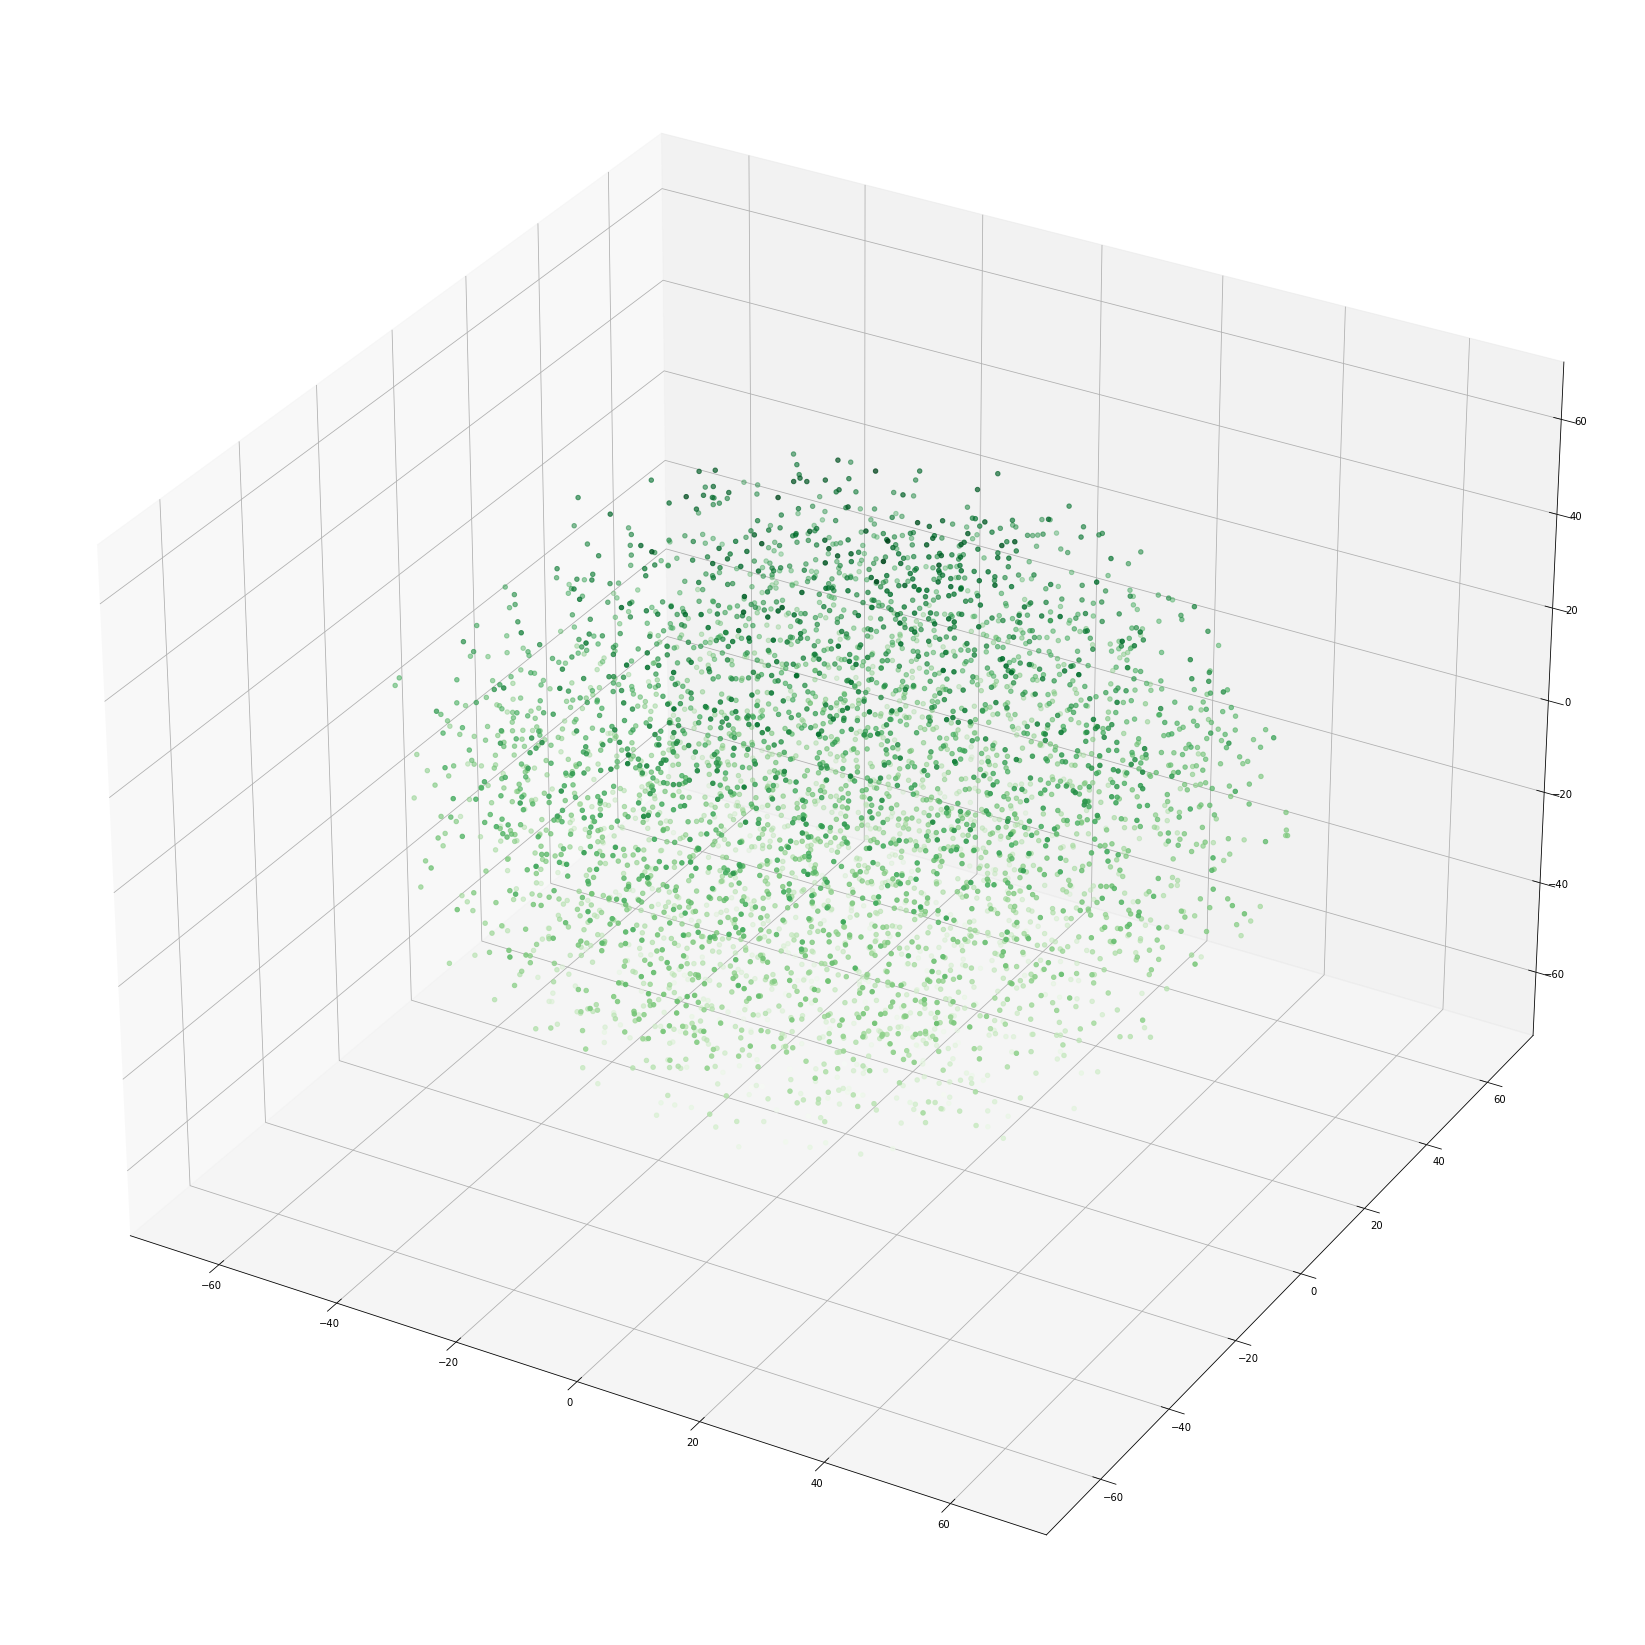

In [285]:
fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.savefig('/Users/anni/Sistemas de Información/Proyecto/hemocho.png')

# 2D

In [286]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [287]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

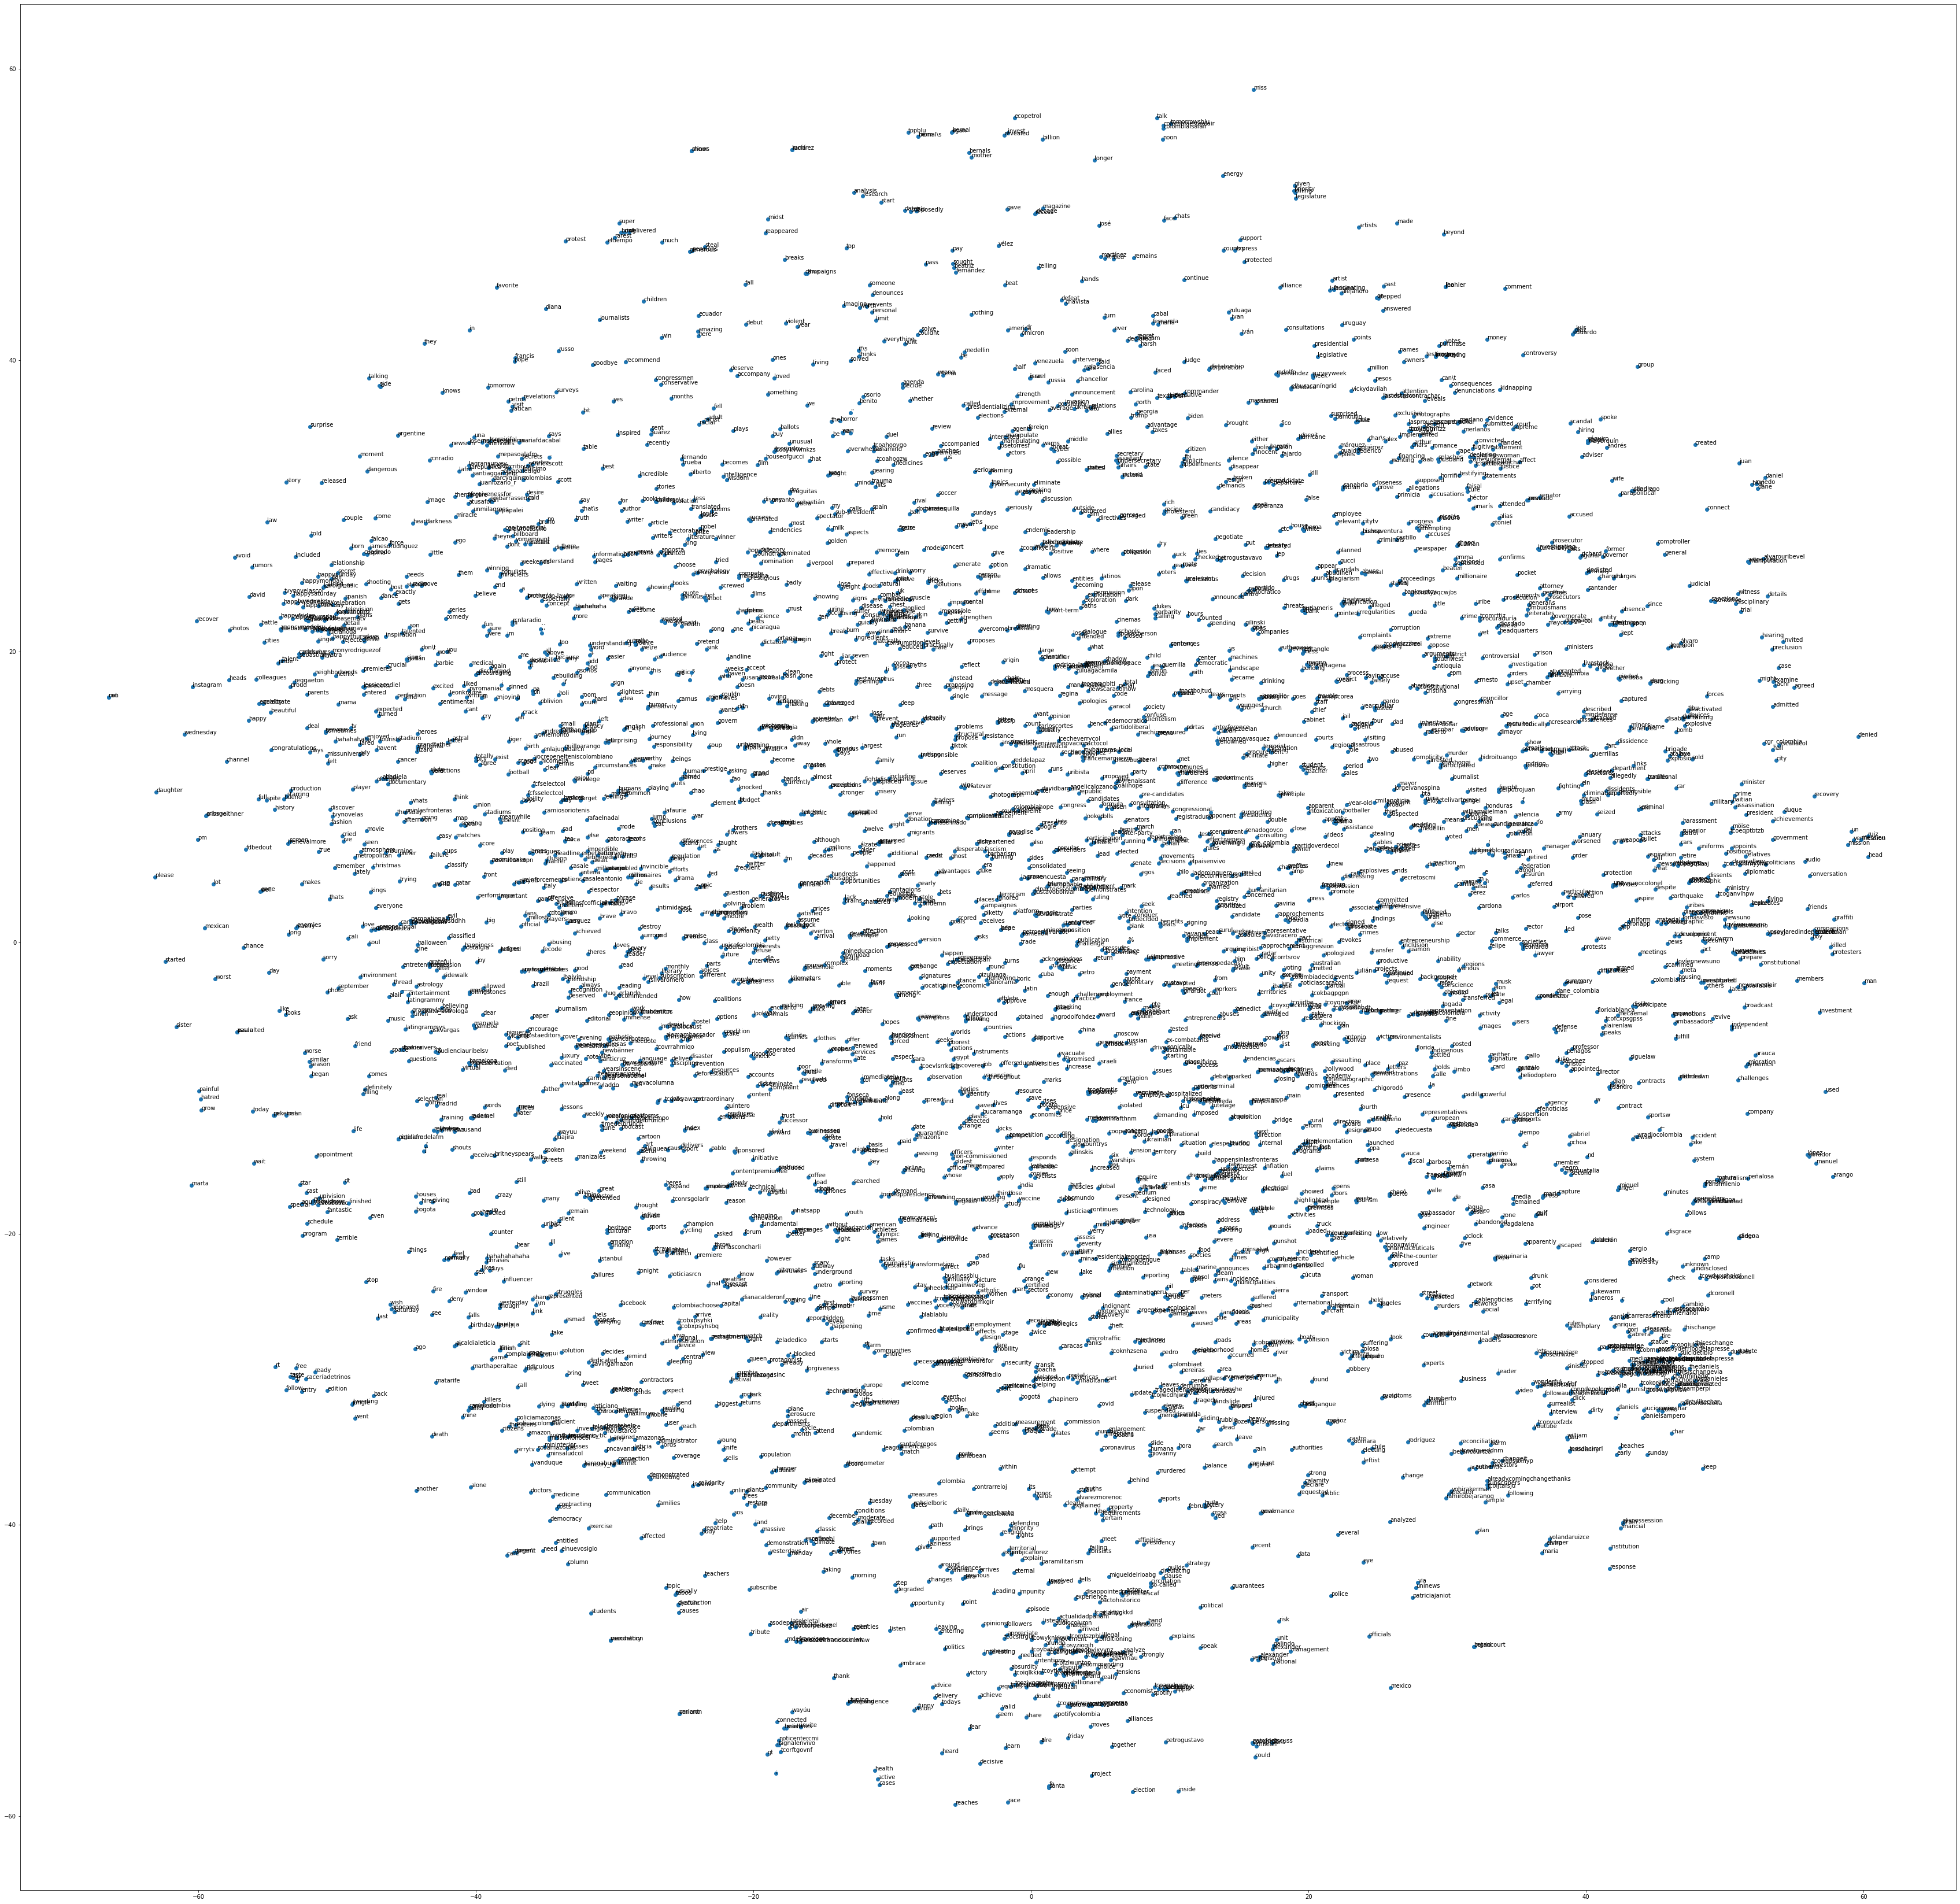

In [291]:
fig = plt.figure(figsize=(60,60))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.savefig('/Users/anni/Sistemas de Información/Proyecto/2dhemocho.png')